In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
clusters = pd.read_csv('cluster_strategic.csv')

In [3]:
clusters.head()

,Unnamed: 0,Angle,Direction,HangTime,LastTrackedDistance,ExitSpeed,3B,5_6_Hole,SS,Up_the_Middle,2B,3_4_Hole,1B,PlayResult,cluster #
0,0,0.868350,0.275039,0.100554,0.121342,0.762034,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,1,0.918357,0.502234,0.154778,0.190322,0.824455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
2,2,0.958225,0.094132,0.433793,0.469123,0.863455,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,3,0.947422,0.235321,0.340720,0.370906,0.752272,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3
4,4,0.642050,0.496386,0.007351,0.020443,0.704999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1


In [4]:
clusters = clusters.drop(columns = 'Unnamed: 0')

In [5]:
clusters.head()

,Angle,Direction,HangTime,LastTrackedDistance,ExitSpeed,3B,5_6_Hole,SS,Up_the_Middle,2B,3_4_Hole,1B,PlayResult,cluster #
0,0.868350,0.275039,0.100554,0.121342,0.762034,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,0.918357,0.502234,0.154778,0.190322,0.824455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
2,0.958225,0.094132,0.433793,0.469123,0.863455,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,0.947422,0.235321,0.340720,0.370906,0.752272,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3
4,0.642050,0.496386,0.007351,0.020443,0.704999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1


In [6]:
cluster_number = clusters['cluster #']

In [7]:
cluster_number

0       0
1       1
2       5
3       3
4       1
       ..
2715    4
2716    1
2717    6
2718    4
2719    1
Name: cluster #, Length: 2720, dtype: int64

In [8]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2720 entries, 0 to 2719
Data columns (total 14 columns):
Angle                  2720 non-null float64
Direction              2720 non-null float64
HangTime               2720 non-null float64
LastTrackedDistance    2720 non-null float64
ExitSpeed              2720 non-null float64
3B                     2720 non-null float64
5_6_Hole               2720 non-null float64
SS                     2720 non-null float64
Up_the_Middle          2720 non-null float64
2B                     2720 non-null float64
3_4_Hole               2720 non-null float64
1B                     2720 non-null float64
PlayResult             2720 non-null float64
cluster #              2720 non-null int64
dtypes: float64(13), int64(1)
memory usage: 297.6 KB


In [9]:
original = pd.read_csv('BIP_numerical_NA_groundballs.csv')

In [10]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2720 entries, 0 to 2719
Data columns (total 61 columns):
Unnamed: 0             2720 non-null int64
Angle                  2720 non-null float64
Balls                  2720 non-null int64
BatterId               2720 non-null float64
BatterSide             2720 non-null int64
Bearing                2720 non-null float64
Direction              2720 non-null float64
Distance               2720 non-null float64
ExitSpeed              2720 non-null float64
Extension              2720 non-null float64
HangTime               2720 non-null float64
HitSpinRate            609 non-null float64
HorzApprAngle          2720 non-null float64
HorzBreak              2720 non-null float64
HorzRelAngle           2720 non-null float64
InducedVertBreak       2720 non-null float64
Inning                 2720 non-null int64
LastTrackedDistance    2720 non-null float64
Outs                   2720 non-null int64
OutsOnPlay             2720 non-null int64
PAofIn

In [11]:
original['3B'] = clusters['3B']
original['5_6_Hole'] = clusters['5_6_Hole']
original['SS'] = clusters['SS']
original['Up_the_Middle'] = clusters['Up_the_Middle']
original['2B'] = clusters['2B']
original['3_4_Hole'] = clusters['3_4_Hole']
original['1B'] = clusters['1B']



In [12]:
original['cluster #'] = clusters['cluster #']

In [15]:
original.head()

,Angle,Balls,BatterId,BatterSide,Bearing,Direction,Distance,ExitSpeed,Extension,HangTime,...,z0,PlayResult,3B,5_6_Hole,SS,Up_the_Middle,2B,3_4_Hole,1B,cluster #
0,-5.922391,1,8889924.0,0,-19.201773,-20.178722,21.666606,97.490851,5.554633,0.149565,...,5.024001,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,-1.774047,3,8889923.0,0,-0.624332,0.190045,33.651032,102.693597,5.549675,0.222021,...,4.863850,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,1.533179,0,8886492.0,1,-35.946978,-36.397544,85.709892,105.944197,5.319046,0.594855,...,6.104358,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,0.637003,0,8881734.0,1,-21.944780,-23.739582,63.686716,96.677192,5.457647,0.470486,...,6.079939,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
4,-24.694851,0,8889924.0,0,-4.367928,-0.334215,4.359958,92.736971,5.575303,0.025022,...,5.262697,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [14]:
original = original.drop(columns = 'Unnamed: 0')

In [16]:
original.to_csv('Batter_Profiles.csv')

In [17]:
clusters.head()

,Angle,Direction,HangTime,LastTrackedDistance,ExitSpeed,3B,5_6_Hole,SS,Up_the_Middle,2B,3_4_Hole,1B,PlayResult,cluster #
0,0.868350,0.275039,0.100554,0.121342,0.762034,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,0.918357,0.502234,0.154778,0.190322,0.824455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
2,0.958225,0.094132,0.433793,0.469123,0.863455,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,0.947422,0.235321,0.340720,0.370906,0.752272,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3
4,0.642050,0.496386,0.007351,0.020443,0.704999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1


In [18]:
cluster_0 = original.loc[original['cluster #'] == 0]
cluster_0.to_csv('cluster_0.csv')
cluster_0['PlayResult'].value_counts(normalize=True)*100

0    78.537736
1    21.462264
Name: PlayResult, dtype: float64

In [19]:
cluster_1 = original.loc[original['cluster #'] == 1]
cluster_1.to_csv('cluster_1.csv')
cluster_1['PlayResult'].value_counts(normalize=True)*100

0    63.028953
1    36.971047
Name: PlayResult, dtype: float64

In [20]:
cluster_2 = original.loc[original['cluster #'] == 2]
cluster_2.to_csv('cluster_2.csv')
cluster_2['PlayResult'].value_counts(normalize=True)*100

0    79.42029
1    20.57971
Name: PlayResult, dtype: float64

In [21]:
cluster_3 = original.loc[original['cluster #'] == 3]
cluster_3.to_csv('cluster_3.csv')
cluster_3['PlayResult'].value_counts(normalize=True)*100

0    56.285714
1    43.714286
Name: PlayResult, dtype: float64

In [22]:
cluster_4 = original.loc[original['cluster #'] == 4]
cluster_4.to_csv('cluster_4.csv')
cluster_4['PlayResult'].value_counts(normalize=True)*100

0    61.19403
1    38.80597
Name: PlayResult, dtype: float64

In [23]:
cluster_5 = original.loc[original['cluster #'] == 5]
cluster_5.to_csv('cluster_5.csv')
cluster_5['PlayResult'].value_counts(normalize=True)*100

0    78.54251
1    21.45749
Name: PlayResult, dtype: float64

In [24]:
cluster_6 = original.loc[original['cluster #'] == 6]
cluster_6.to_csv('cluster_6.csv')
cluster_6['PlayResult'].value_counts(normalize=True)*100

0    85.638298
1    14.361702
Name: PlayResult, dtype: float64

In [25]:
cluster_7 = original.loc[original['cluster #'] == 7]
cluster_7.to_csv('cluster_7.csv')
cluster_7['PlayResult'].value_counts(normalize=True)*100

Series([], Name: PlayResult, dtype: float64)

In [26]:
cluster_8 = original.loc[original['cluster #'] == 8]
cluster_8.to_csv('cluster_8.csv')
cluster_8['PlayResult'].value_counts(normalize=True)*100

Series([], Name: PlayResult, dtype: float64)

In [27]:
cluster_9 = original.loc[original['cluster #'] == 9]
cluster_9.to_csv('cluster_9.csv')
cluster_9['PlayResult'].value_counts(normalize=True)*100

Series([], Name: PlayResult, dtype: float64)

In [28]:
cluster_1.mean(axis=0)

Angle           -1.029092e+01
Balls            1.081292e+00
BatterId         1.870258e+08
BatterSide       6.191537e-01
Bearing          3.289803e-02
                     ...     
Up_the_Middle    1.000000e+00
2B               0.000000e+00
3_4_Hole         0.000000e+00
1B               0.000000e+00
cluster #        1.000000e+00
Length: 61, dtype: float64

In [29]:
cluster_2.mean(axis=0)

Angle           -9.687384e+00
Balls            1.002899e+00
BatterId         2.209993e+08
BatterSide       4.347826e-01
Bearing          1.521364e+01
                     ...     
Up_the_Middle    0.000000e+00
2B               1.000000e+00
3_4_Hole         0.000000e+00
1B               0.000000e+00
cluster #        2.000000e+00
Length: 61, dtype: float64

In [30]:
cluster_3.mean(axis=0)

Angle           -1.122548e+01
Balls            1.051429e+00
BatterId         1.837992e+08
BatterSide       8.742857e-01
Bearing         -2.401274e+01
                     ...     
Up_the_Middle    0.000000e+00
2B               0.000000e+00
3_4_Hole         0.000000e+00
1B               0.000000e+00
cluster #        3.000000e+00
Length: 61, dtype: float64

In [31]:
cluster_4.mean(axis=0)

Angle           -1.141230e+01
Balls            1.067164e+00
BatterId         2.261825e+08
BatterSide       3.022388e-01
Bearing          2.469384e+01
                     ...     
Up_the_Middle    0.000000e+00
2B               0.000000e+00
3_4_Hole         1.000000e+00
1B               0.000000e+00
cluster #        4.000000e+00
Length: 61, dtype: float64

In [32]:
cluster_5.mean(axis=0)

Angle           -1.354388e+01
Balls            1.214575e+00
BatterId         1.488648e+08
BatterSide       8.704453e-01
Bearing         -3.326612e+01
                     ...     
Up_the_Middle    0.000000e+00
2B               0.000000e+00
3_4_Hole         0.000000e+00
1B               0.000000e+00
cluster #        5.000000e+00
Length: 61, dtype: float64

In [33]:
cluster_6.mean(axis=0)

Angle           -1.549483e+01
Balls            9.574468e-01
BatterId         2.400766e+08
BatterSide       2.606383e-01
Bearing          3.226381e+01
                     ...     
Up_the_Middle    0.000000e+00
2B               0.000000e+00
3_4_Hole         0.000000e+00
1B               1.000000e+00
cluster #        6.000000e+00
Length: 61, dtype: float64

In [34]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2720 entries, 0 to 2719
Data columns (total 14 columns):
Angle                  2720 non-null float64
Direction              2720 non-null float64
HangTime               2720 non-null float64
LastTrackedDistance    2720 non-null float64
ExitSpeed              2720 non-null float64
3B                     2720 non-null float64
5_6_Hole               2720 non-null float64
SS                     2720 non-null float64
Up_the_Middle          2720 non-null float64
2B                     2720 non-null float64
3_4_Hole               2720 non-null float64
1B                     2720 non-null float64
PlayResult             2720 non-null float64
cluster #              2720 non-null int64
dtypes: float64(13), int64(1)
memory usage: 297.6 KB


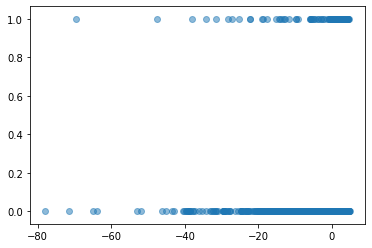

In [35]:
# Graph each variable against Play Result
plt.scatter(cluster_0['Angle'], cluster_0['PlayResult'],alpha=0.5)

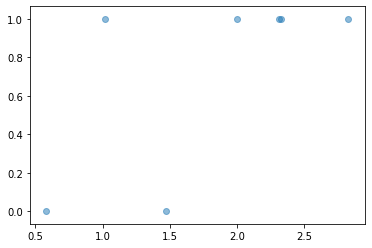

In [36]:
plt.scatter(cluster_0['PositionAt110Y'], cluster_0['PlayResult'],alpha=0.5)

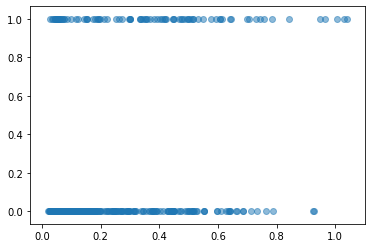

In [37]:
plt.scatter(cluster_0['HangTime'], cluster_0['PlayResult'],alpha=0.5)

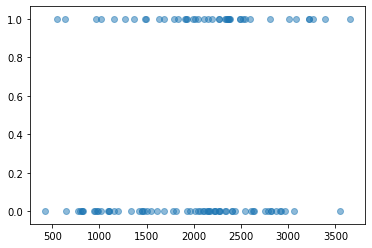

In [38]:
plt.scatter(cluster_0['HitSpinRate'], cluster_0['PlayResult'],alpha=0.5)

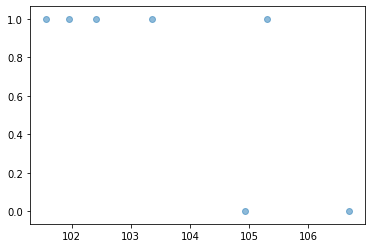

In [39]:
plt.scatter(cluster_0['PositionAt110X'], cluster_0['PlayResult'],alpha=0.5)

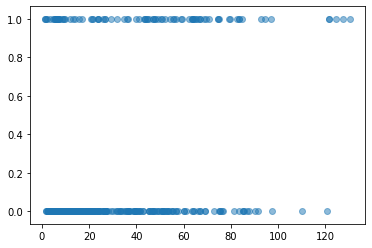

In [40]:
plt.scatter(cluster_0['LastTrackedDistance'], cluster_0['PlayResult'],alpha=0.5)

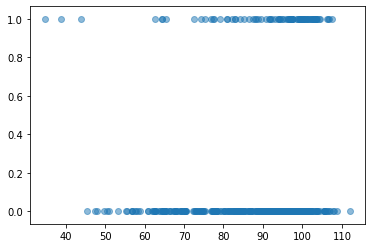

In [41]:
plt.scatter(cluster_0['ExitSpeed'], cluster_0['PlayResult'],alpha=0.5)

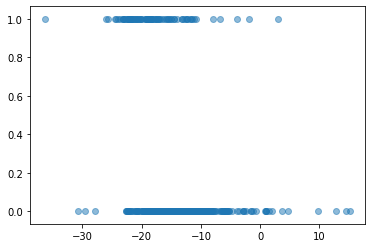

In [42]:
plt.scatter(cluster_0['Bearing'], cluster_0['PlayResult'],alpha=0.5)

In [43]:
cluster_0_analysis = cluster_0.mean(axis = 0)

In [44]:
cluster_1_analysis = cluster_1.mean(axis = 0)

In [45]:
cluster_2_analysis = cluster_2.mean(axis = 0)

In [46]:
cluster_3_analysis = cluster_3.mean(axis = 0)

In [47]:
cluster_4_analysis = cluster_4.mean(axis = 0)

In [48]:
cluster_5_analysis = cluster_5.mean(axis = 0)

In [49]:
cluster_6_analysis = cluster_6.mean(axis = 0)

In [50]:
cluster_7_analysis = cluster_7.mean(axis = 0)

In [51]:
cluster_8_analysis = cluster_8.mean(axis = 0)

In [52]:
cluster_9_analysis = cluster_9.mean(axis = 0)

In [53]:
cluster_7.mean(axis = 0)

Angle           NaN
Balls           NaN
BatterId        NaN
BatterSide      NaN
Bearing         NaN
                 ..
Up_the_Middle   NaN
2B              NaN
3_4_Hole        NaN
1B              NaN
cluster #       NaN
Length: 61, dtype: float64

In [54]:
cluster_7.PlayResult.value_counts()

Series([], Name: PlayResult, dtype: int64)

In [55]:
cluster_0_analysis

Angle           -1.089861e+01
Balls            1.030660e+00
BatterId         1.931750e+08
BatterSide       7.617925e-01
Bearing         -1.445136e+01
                     ...     
Up_the_Middle    0.000000e+00
2B               0.000000e+00
3_4_Hole         0.000000e+00
1B               0.000000e+00
cluster #        0.000000e+00
Length: 61, dtype: float64

In [56]:
#Cluster_Angle = (cluster_0_analysis['Angle'],cluster_1_analysis['Angle'],cluster_2_analysis['Angle'],cluster_3_analysis['Angle'],cluster_4_analysis['Angle'],cluster_5_analysis['Angle'],cluster_6_analysis['Angle'])
Cluster_Angle = (cluster_0_analysis['Angle'],cluster_1_analysis['Angle'],cluster_2_analysis['Angle'],cluster_3_analysis['Angle'],cluster_4_analysis['Angle'],cluster_5_analysis['Angle'],cluster_6_analysis['Angle'],cluster_7_analysis['Angle'],cluster_8_analysis['Angle'],cluster_9_analysis['Angle'])

In [57]:
Cluster_Angle

(-10.898609048599061,
 -10.290920805858566,
 -9.687383767414497,
 -11.225483923648577,
 -11.412301400697762,
 -13.543880598506062,
 -15.494832390930851,
 nan,
 nan,
 nan)

In [58]:
Cluster_PositionAt110Y = (cluster_0_analysis['PositionAt110Y'],cluster_1_analysis['PositionAt110Y'],cluster_2_analysis['PositionAt110Y'],cluster_3_analysis['PositionAt110Y'],cluster_4_analysis['PositionAt110Y'],cluster_5_analysis['PositionAt110Y'],cluster_6_analysis['PositionAt110Y'],cluster_7_analysis['PositionAt110Y'],cluster_8_analysis['PositionAt110Y'],cluster_9_analysis['PositionAt110Y'])

In [59]:
Cluster_HangTime = (cluster_0_analysis['HangTime'],cluster_1_analysis['HangTime'],cluster_2_analysis['HangTime'],cluster_3_analysis['HangTime'],cluster_4_analysis['HangTime'],cluster_5_analysis['HangTime'],cluster_6_analysis['HangTime'],cluster_7_analysis['HangTime'],cluster_8_analysis['HangTime'],cluster_9_analysis['HangTime'])

In [60]:
Cluster_HitSpinRate = (cluster_0_analysis['HitSpinRate'],cluster_1_analysis['HitSpinRate'],cluster_2_analysis['HitSpinRate'],cluster_3_analysis['HitSpinRate'],cluster_4_analysis['HitSpinRate'],cluster_5_analysis['HitSpinRate'],cluster_6_analysis['HitSpinRate'],cluster_7_analysis['HitSpinRate'],cluster_8_analysis['HitSpinRate'],cluster_9_analysis['HitSpinRate'])

In [61]:
Cluster_PositionAt110X = (cluster_0_analysis['PositionAt110X'],cluster_1_analysis['PositionAt110X'],cluster_2_analysis['PositionAt110X'],cluster_3_analysis['PositionAt110X'],cluster_4_analysis['PositionAt110X'],cluster_5_analysis['PositionAt110X'],cluster_6_analysis['PositionAt110X'],cluster_7_analysis['PositionAt110X'],cluster_8_analysis['PositionAt110X'],cluster_9_analysis['PositionAt110X'])

In [62]:
Cluster_LastTrackedDistance = (cluster_0_analysis['LastTrackedDistance'],cluster_1_analysis['LastTrackedDistance'],cluster_2_analysis['LastTrackedDistance'],cluster_3_analysis['LastTrackedDistance'],cluster_4_analysis['LastTrackedDistance'],cluster_5_analysis['LastTrackedDistance'],cluster_6_analysis['LastTrackedDistance'],cluster_7_analysis['LastTrackedDistance'],cluster_8_analysis['LastTrackedDistance'],cluster_9_analysis['LastTrackedDistance'])

In [63]:
Cluster_ExitSpeed = (cluster_0_analysis['ExitSpeed'],cluster_1_analysis['ExitSpeed'],cluster_2_analysis['ExitSpeed'],cluster_3_analysis['ExitSpeed'],cluster_4_analysis['ExitSpeed'],cluster_5_analysis['ExitSpeed'],cluster_6_analysis['ExitSpeed'],cluster_7_analysis['ExitSpeed'],cluster_8_analysis['ExitSpeed'],cluster_9_analysis['ExitSpeed'])

In [64]:
Cluster_Bearing = (cluster_0_analysis['Bearing'],cluster_1_analysis['Bearing'],cluster_2_analysis['Bearing'],cluster_3_analysis['Bearing'],cluster_4_analysis['Bearing'],cluster_5_analysis['Bearing'],cluster_6_analysis['Bearing'],cluster_7_analysis['Bearing'],cluster_8_analysis['Bearing'],cluster_9_analysis['Bearing'])

In [65]:
Cluster_PlayResult= (cluster_0_analysis['PlayResult'],cluster_1_analysis['PlayResult'],cluster_2_analysis['PlayResult'],cluster_3_analysis['PlayResult'],cluster_4_analysis['PlayResult'],cluster_5_analysis['PlayResult'],cluster_6_analysis['PlayResult'],cluster_7_analysis['PlayResult'],cluster_8_analysis['PlayResult'],cluster_9_analysis['PlayResult'])

In [66]:
Cluster_cluster = (cluster_0_analysis['cluster #'],cluster_1_analysis['cluster #'],cluster_2_analysis['cluster #'],cluster_3_analysis['cluster #'],cluster_4_analysis['cluster #'],cluster_5_analysis['cluster #'],cluster_6_analysis['cluster #'],cluster_7_analysis['cluster #'],cluster_8_analysis['cluster #'],cluster_9_analysis['cluster #'])

In [67]:
# Plot each mean vs hit prob for each cluster

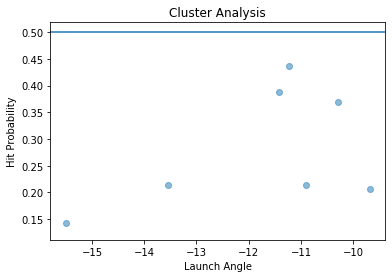

In [68]:
plt.scatter(Cluster_Angle, Cluster_PlayResult,alpha=0.5)
plt.xlabel('Launch Angle')
plt.ylabel('Hit Probability')
plt.title('Cluster Analysis')
plt.axhline(y=0.5)
plt.savefig('launch_angle.png')

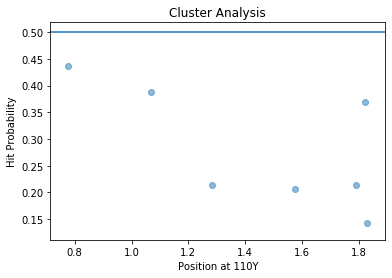

In [69]:
plt.scatter(Cluster_PositionAt110Y, Cluster_PlayResult,alpha=0.5)
plt.xlabel('Position at 110Y')
plt.ylabel('Hit Probability')
plt.title('Cluster Analysis')
plt.axhline(y=0.5)
plt.savefig('pos_at_110Y.png')

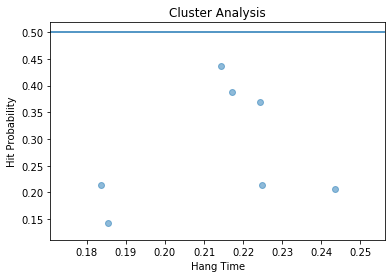

In [70]:
plt.scatter(Cluster_HangTime, Cluster_PlayResult,alpha=0.5)
plt.xlabel('Hang Time')
plt.ylabel('Hit Probability')
plt.title('Cluster Analysis')
plt.axhline(y=0.5)
plt.savefig('hang_time.png')

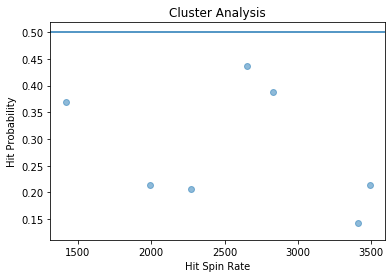

In [71]:
plt.scatter(Cluster_HitSpinRate, Cluster_PlayResult,alpha=0.5)
plt.xlabel('Hit Spin Rate')
plt.ylabel('Hit Probability')
plt.title('Cluster Analysis')
plt.axhline(y=0.5)
plt.savefig('spin_rate.png')

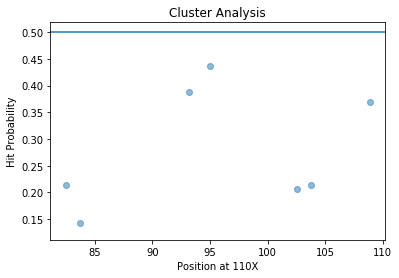

In [72]:
plt.scatter(Cluster_PositionAt110X, Cluster_PlayResult,alpha=0.5)
plt.xlabel('Position at 110X')
plt.ylabel('Hit Probability')
plt.title('Cluster Analysis')
plt.axhline(y=0.5)
plt.savefig('pos_at_110X.png')

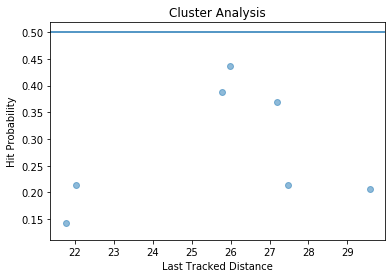

In [73]:
plt.scatter(Cluster_LastTrackedDistance, Cluster_PlayResult,alpha=0.5)
plt.xlabel('Last Tracked Distance')
plt.ylabel('Hit Probability')
plt.title('Cluster Analysis')
plt.axhline(y=0.5)
plt.savefig('last_tracked_distance.png')

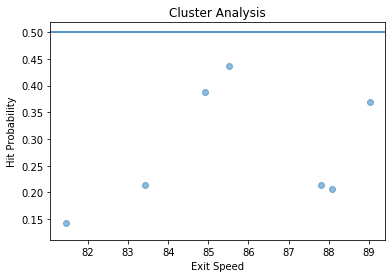

In [74]:
plt.scatter(Cluster_ExitSpeed, Cluster_PlayResult,alpha=0.5)
plt.xlabel('Exit Speed')
plt.ylabel('Hit Probability')
plt.title('Cluster Analysis')
plt.axhline(y=0.5)
plt.savefig('exit_speed.png')

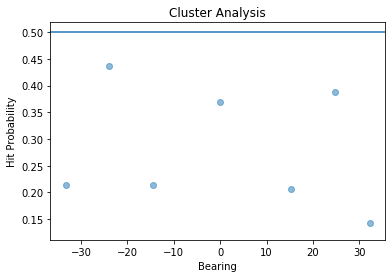

In [75]:
plt.scatter(Cluster_Bearing, Cluster_PlayResult,alpha=0.5)
plt.xlabel('Bearing')
plt.ylabel('Hit Probability')
plt.title('Cluster Analysis')
plt.axhline(y=0.5)
plt.savefig('bearing.png')

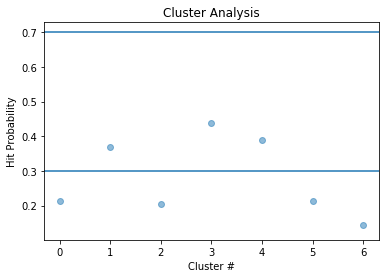

In [76]:
plt.scatter(Cluster_cluster, Cluster_PlayResult,alpha=0.5)
plt.xlabel('Cluster #')
plt.ylabel('Hit Probability')
plt.title('Cluster Analysis')
plt.axhline(y=0.30)
plt.axhline(y=0.70)
plt.savefig('hit_prob.png')

In [77]:
Cluster_Angle

(-10.898609048599061,
 -10.290920805858566,
 -9.687383767414497,
 -11.225483923648577,
 -11.412301400697762,
 -13.543880598506062,
 -15.494832390930851,
 nan,
 nan,
 nan)

In [78]:
data = (Cluster_Bearing,
        Cluster_Angle,
        Cluster_ExitSpeed,
        Cluster_HitSpinRate,
        Cluster_HangTime,
        Cluster_PositionAt110Y,
        Cluster_PositionAt110X,
        Cluster_LastTrackedDistance,
        Cluster_PlayResult)

In [79]:
df = pd.DataFrame(data, columns = ['Cluster 1',
                                   'Cluster 2',
                                   'Cluster 3',
                                   'Cluster 4',
                                   'Cluster 5',
                                   'Cluster 6',
                                   'Cluster 7',
                                   'Cluster 8',
                                   'Cluster 9',
                                  'Cluster 10']) 
df = df.T
df.columns = ('Bearing','Launch Angle','Exit Speed','Hit Spin Rate','Hang Time','Position at 110Y','Position at 110X','Last Tracked Distance','Play Result')

In [80]:
df

,Bearing,Launch Angle,Exit Speed,Hit Spin Rate,Hang Time,Position at 110Y,Position at 110X,Last Tracked Distance,Play Result
Cluster 1,-14.451363,-10.898609,87.811537,1992.543715,0.224883,1.790329,103.745201,27.473359,0.214623
Cluster 2,0.032898,-10.290921,89.023104,1417.437847,0.224397,1.821177,108.887258,27.186623,0.369710
Cluster 3,15.213641,-9.687384,88.089871,2271.459386,0.243511,1.575137,102.576139,29.572581,0.205797
Cluster 4,-24.012744,-11.225484,85.509444,2651.392075,0.214259,0.777103,95.014123,25.978235,0.437143
Cluster 5,24.693837,-11.412301,84.909549,2831.654418,0.217194,1.066953,93.162025,25.766967,0.388060
Cluster 6,-33.266120,-13.543881,83.419521,3491.617541,0.183564,1.282825,82.486111,22.032285,0.214575
Cluster 7,32.263809,-15.494832,81.452510,3412.600506,0.185439,1.830480,83.691173,21.770235,0.143617
Cluster 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cluster 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cluster 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df.to_csv('Cluster_Means_Bearing.csv')